# Project 1 - Titanic data analysis & classification using decision tree

Please fill in here the group ID of your team:

6

Please fill in here the name(s) of the group member(s):

Selen Thomas - 000474193


## useful libraries import and first data loading

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

in the next cell, use a method to display the first 10 rows of the dataframe

In [23]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


The data model is the following one:

1. `PassengerId`: id of the passenger
2. `Survived`: 1: survived; 0: dies
3. `Pclass`: class of the passenger (1st, 2nd or 3rd)
4. `Name`: Name of the passenger
5. `Sex`: Sex (male or female)
6. `Age`: Age in years
7. `SibSp`: number of siblings or spouses on board
8. `Parch`: number of parents or children onboard
9. `Ticket`: ticket number
10. `Fare`: fare paid
11. `Cabin`: cabin number
12. `Embarked`: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

The goal of the project will be twofold:
1. In Part A, you will perform some data aggregations and data plottings using the same libraries as the ones used during the notebook sessions in class

2. In Part B, you will train and test a `DecisionTreeClassifier`. You can find a nice interactive walkthrough to what a decision classifier is on [this link](https://mlu-explain.github.io/decision-tree/). You might want to read it carefully.

## Part A - data exploration

# Question A.1
Use the `isna()`method followed by the `sum()` operator to check for null values in the data set.
Compare this to the full length of the dataset.

What conclusion can you draw ?
Based on the amount of `na`, are there columns you believe you should discard later on when performing the classifications?



In [24]:
# Calculating the number of missing values per column
missing_values_count = df.isna().sum()

# Calculating the total number of values in the DataFrame
total_values = len(df)

# Calculation of percentages of missing values by column
missing_values_percentage = (missing_values_count / total_values) * 100

print(f"-- Here is the number of null values by category :\n{missing_values_count}")
print(f"\n-- Here is the length of the data frame :\n{total_values}")
print(f"\n-- Dividing each category by the length of the data frame gives the percentage of missing values(%):\n{missing_values_percentage}")

-- Here is the number of null values by category :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

-- Here is the length of the data frame :
891

-- Dividing each category by the length of the data frame gives the percentage of missing values(%):
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


-> We observe that three columns contain at least one missing value: `Age`, `Cabin`, and `Embarked`.
In relation to the total length of the database, we calculate the percentages as shown above.

The presence of these percentages can be justified by the unavailability of information in the data frame.
This is of particular concern for the `Age` and `Cab` columns, for which **20%** and **77%** of data are missing, respectively.

A potential solution is to reject both columns or replace the missing values with an average, using the command `df.fillna()`.

In summary, the data frame contains **891** entries; however, not all entries are complete. Some personal data (rows) are missing for certain attributes. It is therefore imperative to undertake a data cleaning phase before running machine learning or decision tree algorithms on the dataset.


**Your answer below the line:**

---




## Question A.2.
What is the percentage of passengers who effectively survived ?
Please perform the computation in the below cell using methods of the pandas library.

In [25]:
# Calculation of the percentage of passengers who survived
survived_percentage = (df['Survived'].sum() / total_values) * 100

print(f"-- Percentage of passengers who survived : \n{survived_percentage:.2f}%")

-- Percentage of passengers who survived : 
38.38%


-> Percentage of passengers who survived : **38.38%**

**Your answer here below the line** (as derived from your notebook cell above)


---



## Question A.3
Was the proportion of survirvors different among men and women ?
Is there a significant difference between those two numbers?
How would you interpret this difference, if any? Add you text response in the text cell below this code cell

Show this graphically using a `sns.barplot`.

To do this, you should work in two steps:
1. create a `df_agg` dataframe aggregating the `df` by using the `groupby` and the `agg` methods on the dataframe;
2. feed this `df_agg`as data option to a `sns.barplot` using `Sex` as the `x` entry and the `Survived` as the `hue`(color) entry

-- We counted a total of 314 women who boarded the Titanic, of which only 233 survived, representing 74%.
-- We counted a total of 577 men who boarded the Titanic, of which only 109 survived, representing 19%.


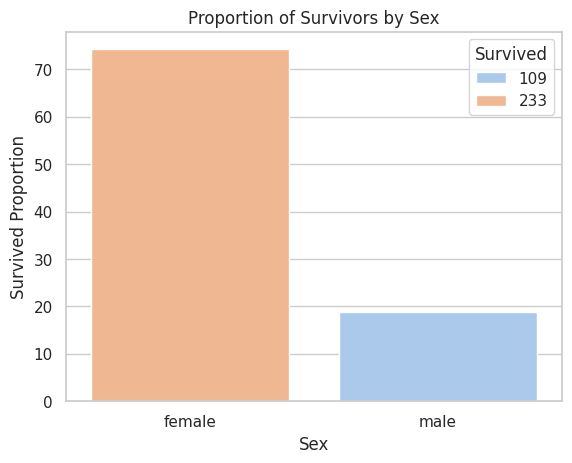

In [26]:
# Separation of gender into male and female and initialization of total and survived variables
df_agg = df.groupby('Sex').agg(Total=('PassengerId', 'count'), Survived=('Survived', 'sum')).reset_index()

# Calculating the proportion of survivors
df_agg['Survived Proportion'] = (df_agg['Survived'] / df_agg['Total']) * 100

# Graphic with seaborn
sns.set(style="whitegrid")
barplot = sns.barplot(data=df_agg, x='Sex', y='Survived Proportion', hue = 'Survived', palette='pastel')
barplot.set_title('Proportion of Survivors by Sex')

# Verification
print(f"-- We counted a total of {df_agg['Total'][0]} women who boarded the Titanic, of which only {df_agg['Survived'][0]} survived, representing {df_agg['Survived Proportion'][0]:.0f}%.")
print(f"-- We counted a total of {df_agg['Total'][1]} men who boarded the Titanic, of which only {df_agg['Survived'][1]} survived, representing {df_agg['Survived Proportion'][1]:.0f}%.")

-> Graphically, the percentage of survivors who are female greatly surpasses that of males. The disparity is notable, with **74%** of survivors being female compared to only **18%** for males.

In purely statistical terms, it could be said that the female gender is positively associated with the `Survived` variable (they are correlated), while the `Sex` variable being male tends to be inversely related to survival.

This observation gives credence to the well-known maxim: "*Women and children first*".

**Your answer here below the line**


---



## Question A.4
From what port did most passengers embark the Titanic ?
Again, you'll have to use groupby and aggregation on the dataframe.

Add you text response in the text cell below this code cell.

In [27]:
# agg. method for grouping by 'Embarked' and counting the number of passengers for each port
embarkation_counts = df.groupby('Embarked').agg(Total_Passengers=('PassengerId', 'count')).reset_index()

# Sort results to find the port with the most passengers
most_embarkation = embarkation_counts.sort_values(by='Total_Passengers', ascending=False)

print(most_embarkation.to_string(index=False))

Embarked  Total_Passengers
       S               644
       C               168
       Q                77


-> We can see that the `S` boat door is the most used, with **644** people, followed by the `C` door with **168** and then the `Q` door with **77** people.

An interesting element would be to use the `agg.` method to determine what proportion of survivors embarked via the `S`, `C` and `Q` gates.

**Your answer here below the line**


---



## Question A.5
Among the survivors, what was the largest value for `Parch` and for `SibSp`?
Add you text response in the text cell below this code cell.

Proceed in two steps:
1. Define a `df_survived` dataframe by filtering the `df` on `"Survived" = 1`
2. Select the appropriate columns and do a `max` on those

In [28]:
# Survivor filtering
df_survived = df[df['Survived'] == 1]

# Find the maximum value for Parch and SibSp among survivors
max_parch = df_survived['Parch'].max()
max_sibsp = df_survived['SibSp'].max()

print(f"-- The maximum value for 'Parch' among survivors is : {max_parch}")
print(f"-- The maximum value for 'SibSp' among survivors is : {max_sibsp}")

-- The maximum value for 'Parch' among survivors is : 5
-- The maximum value for 'SibSp' among survivors is : 4


-> Among the survivors of the sinking of the Titanic, we can count **5** parents or children (`Parch`). And only **4** siblings or spouses (`SibSp`).

**Your answer here below the line**


---



# Part B - classifications

## Question B.1
In the next code cell, we will remove the following columns
1. `PassengerId`
2. `Name`
3. `Ticket`
4. `Cabin`

We remove the first 3 columns because they are uniquely identifying each sample and do not provide any meaningful information to classify the passengers.
But why do we also remove the `Cabin` column ?
Please justify this in the text cell below the code cell.
Also, don't forget to run the cell :-)

In [29]:
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

-> As we have seen, the `Cabin` column includes **77%** of null values, which dominates the data in the column. Given this substantial proportion of missing information, using a strategy like `df.fillna()` to impute these missing values is impractical for the `Cabin` column. We therefore choose to delete this column.

This decision results in a loss of data in our database, but improves the accuracy of the remaining data.

*There are no free meals. A tradeoff is necessary*.

The concept of tradeoffs and the no free lunch theorem are essential in the fields of machine learning and database management. Decision-making always involves choices, and we aim for the option that best reflects reality. In striving for an unbiased dataset and model, a compromise on accuracy may be justified. This is the reasoning behind our decision to eliminate the "cab" column. The use of imputation methods to supplement zero values with estimated figures would potentially introduce a bias, particularly given the high proportion of missing data. Thus, any form of approximation could be detrimental to the accurate representation of reality.

**Your answer below the line**


---



## Question B.2
We will now handle the missing values for the age.
In the next cell, we are computing the average age accross all passengers.

We then use this mean age as age value for all passengers for which age is `NA`.

It's indeed one of the ways of performing "imputation" to replace missing values.

Could you give two others ways we could have performed this? Put your answer in the markdown cell after the code cell below.

Also, don't forget to run the cell :-)

In [30]:
mean_age = df["Age"].dropna().mean()
import numpy as np
df["Age"] = np.where(df["Age"].isna(), mean_age, df["Age"])

-> Since we have no choice but to replace the null values, we need to find a way of approximating the `Age` variable as closely as possible. The `mode` method may be a solution to this problem, as it will be based on the values of the `Age` variable already present:
````
# Calculate the mode
mode_age = df['Age'].mode()[0]  # The mode() returns a series, so we take the first element

# Replace missing values with the mode
df['Age'].fillna(value=mode_age, inplace=True)

# Verification
print(df['Age'].isnull().sum()) # Should be equal to O

````

-> We could also take this a step further and replace the `mean` by the `median` to improve robustness against possible outliers.
````
# Calculate the median
median_age = df["Age"].median()

# Replace missing values with the median
df["Age"].fillna(value=median_age, inplace=True)

# Verification
print(df['Age'].isnull().sum()) # Should be equal to O
````
-> After much research, I've also found conditional imputation and KNN imputation to be useful when data have complex patterns or relationships between variables. Unfortunately, I found these methods less suitable as I didn't have any variables with complex patterns or concrete relationships between them.

**Your answer here below the line**


---




## Question B.3 - Removing "na" for embarked
We will finally tackle the missing values for `Embarked` feature by simply removing the sample for which embarked is null.
How can you justify this choice? Write your answer in the markdown cell after the next code cell.
Also, don't forget to run the cell :)

In [31]:
df = df.dropna()

-> One of the reasons for this choice is that the number of null values for the `Embarked` variable represents a very small part of the dataframe (**0.22%**). This is largely negligible.

Another reason could be the importance of the information: we could simply consider that the **0.22%** of information we accept to lose is not useful to obtain a decision tree faithful to the dataframe. Or, quite simply, we decide to eliminate these samples for the sake of simplicity.

We must always think in terms of *tradeoff*, and assume that *there is no freemeal*. We agree to remove **0.22%** of the dataframe to achieve better accuracy.

**Your answer here**


---



## Question B.4
We will now perform one-hot encoding on the two remaining categorical variables, which are:
1. `Sex`
2. `Embarked`

To do this, simply call the `get_dummies` pandas method on your dataframe by passing it the appropriate column names.
Check the `df.columns` afterwards to see the effect and validate it worked

In [32]:
# Apply one-hot encoding to 'Sex' and 'Embarked' columns
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

# Verification
print(df.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


-> We can see that thanks to one hot encoding, the `Sex` variable is replaced by **female** and **male** gender. And the variable `Embarked` has been replaced by the various embarkation gates (**C**, **Q**, **S**).

## Question B.5
In the next cell, we define the `target` (`y`) as the `Survived` column of the dataframe.
We take the other columns as input features and put them in the `X` dataframe.
Fill in the last line of code to split both X and y into a _train and a _test subsets where 80% of the data go into the train subset

In [33]:
y = df['Survived']
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

# train test for 80% of dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

-> As explained in the statement, we run our `X` and `y` variables and create further X and y variables for the training and test parts of the database (**80%** of the data for the training part and **20%** for the test part).

The aim here is to train our model on the training part and then test these predictions on the test set, in order to check whether the successful model has mastered our database and is able to predict what we want.

We use the method of supervised machine learning. This is one of three machine learning methods: supervised machine learning, unsupervised machine learning and reinforcement-based machine learning.

## Question B.6
In the next cell, we instantiate a `DecisionTreeClassifier`
On line 2 of the cell, you need to train the classifier by calling the `fit` method on `X_train`and `y_train`.

Then we use the trained classifier to predict the `Survived` class on both the training and testing subsets

In [34]:
tree = DecisionTreeClassifier()

# fit method
tree.fit(X_train, y_train)

yhat_train = tree.predict(X_train)
yhat_test = tree.predict(X_test)

-> As explained above, we simply ask our model to train on the training part of our dataframe and to predict the search variable `y` (the class `Survived`).

## Question B.7
You now need to compute the score of the classifier using the `accuracy_score` method as already imported earlier in the notebook.

Compute the accuracy score for both the `yhat_train` and the `yhat_test` predictions obtained respectively on the training and test subsets.

How do those 2 numbers compare? What do you think is happening with the model? Could you elaborate? Check the depth using [the approriate method of the decision tree provided by scikitlearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). What is the depth of the tree?


Write your answer below the two cells after you have computed the accuracy scores.

In [35]:
# Compute accuracy score on train set below
# Compute accuracy score on test set below
# Compute depth of tree

# Calculate accuracy on the training set
accuracy_train = accuracy_score(y_train, yhat_train)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, yhat_test)

# Calculate the depth of tree
depth = tree.get_depth()

print(f"-- Accuracy on training set: {accuracy_train:.2f}")
print(f"-- Accuracy on test set: {accuracy_test:.2f}")
print(f"-- Depth of the tree: {depth}")

-- Accuracy on training set: 0.99
-- Accuracy on test set: 0.76
-- Depth of the tree: 20


-> We can see that we have a significant difference between the score obtained for the train model, which is very good (**99%**), and the score obtained for the test model, which is less good (**76%**). Furthermore, an important element to take into account is the depth of our decision tree, which here is **20**. We were able to obtain this number thanks to the `get_depth` command taken directly from the `scikitlearn documentation`.

The tree depth represents the size of the decision tree in the `DecisionTreeClassifier` function. Each additional level of depth represents an additional subdivision of the tree and therefore additional choices.

We can draw several conclusions from this information: firstly, there's a good chance we're suffering from **overfitting**.

Overfitting means that the model learns the details and noise specific to the training set so well that it loses its ability to generalize on new data (the test set in this case). This explains the significant difference in accuracy between the training set and the test set.

In addition, we can see that the depth of the tree also points in the direction of overfitting, since a tree with a depth of **20** means that it makes a set of **20** different choices to answer a question. As we've seen in the documentation and in the animation provided with this notebook, it's preferable to limit the number of depth layers in a tree, precisely to limit the effect of overfitting.



---



## Question B.8
To avoid this problem, we might play around with the `max_depth` parameter that can be passed on to the `DecisionTreeClassifier`.

In the next cell, copy-paste the content of the previous 3 code cells by playing around with this parameter. Make sure you create other variables than the ones already existing to avoid overriding them

Do you find any better result doing so ?

In [36]:
# max_depth adjusted
tree_adjusted = DecisionTreeClassifier(max_depth=4) # Example

# Adjusted tree training
tree_adjusted.fit(X_train, y_train)

# Prediction
yhat_train_adjusted = tree_adjusted.predict(X_train)
yhat_test_adjusted = tree_adjusted.predict(X_test)

# Precision calculation
accuracy_train_adjusted = accuracy_score(y_train, yhat_train_adjusted)
accuracy_test_adjusted = accuracy_score(y_test, yhat_test_adjusted)
depth_adjusted = tree_adjusted.get_depth()

print(f"-- Adjusted accuracy on training set: {accuracy_train_adjusted:.2f}")
print(f"-- Adjusted accuracy on test set: {accuracy_test_adjusted:.2f}")
print(f"-- Depth of the adjusted tree: {depth_adjusted}")


-- Adjusted accuracy on training set: 0.83
-- Adjusted accuracy on test set: 0.79
-- Depth of the adjusted tree: 4


-> As we explained earlier, reducing the depth of the tree helped solve the **overfitting** problem.

Indeed, with a shallower depth, the model is less affected by noise and expetions. This has the effect of increasing the accuracy score for the test set, but reducing the score for the training set.

Once again, it's a tradeoff: *you never get a freemeal*.

It's usually better to lose precision (in this case, to have a less accurate score for the training test) but to be as unbiased as possible (in this case, to maximize the test set score).

-> Extra explanation:

It's important to point out the **lack of rigor** in the method we've just used.

Firstly, we have a randomness inconsistency. In question B.5, we first set a certain `train group` and a `test group`, respecting the proportions of **80%** and **20%**. On these sets, we train the decision tree using the `DecisionTreeClassifier`, to obtain a score for our train and test groups. Subsequently, however, we'll perform the `DecisionTreeClassifier` operation again (B.8), but this time with a self-imposed `max_depth` option, the purpose of which will be to show the impact of overffiting in our initial model.

The problem is that we've not only modified the `max_depth` option, but also the **randomness** established in question B.5, which had set the train and test groups in a totally random way. In fact, the two new train and test groups that have been created, and which have replaced those used in the previous question, respect the proportions of **80%** and **20%**, but do not retain the same values at all. We therefore find ourselves in a situation where two distinct elements have been changed, and so we are unable to see the unique impact of the `max_depth` option.

Fortunately, we can see in the rest of the file that we're going to solve this inconsistency problem by working with a more rigorous model and a for loop that will give us additional precision. So there's no need to find a solution such as a for `loop` or a `random_state` that would fix the random argument, as we're going to correct this right afterwards.

**Your answer here below the line**


---



## Question B.9
We will now look for a good value of the `tree_depth` parameter in a more rigorous way.
Fill in the missing part in the two for loops below.
The first loop is over the different values for `max_depth` that we want to check. For each `max_depth`, we perform the training and evaluation of the models 10 times to perform averages and avoid statistical errors. Why do you think we need to re-call each time `train_test_split` ?

Write your answer below the code cell.


We then build a dataframe containing the different accuracies for each type of dataset (test, train) and for each depth and store it in `df_accuracies`. This dataframe contains one row per iteration performed. This means that for the same depth and type of dataset (train or test), we have as many rows as there are iterations in the second for loop.

In [37]:
accuracies = []
types = []
depths = []
for max_depth in range(1, 20):
    for iter in range(0, 10):

        # redefinition of the learning and test set at each iteration
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

        # Create and train classifier for current depth
        tree_for_range = DecisionTreeClassifier(max_depth=max_depth)
        tree_for_range.fit(X_train, y_train)

        # Prediction on training and test sets
        yhat_train_tree_for_range = tree_for_range.predict(X_train)
        yhat_test_tree_for_range = tree_for_range.predict(X_test)

        # Accuracy calculation for training and test sets
        train_accuracy = accuracy_score(y_train, yhat_train_tree_for_range)
        test_accuracy = accuracy_score(y_test, yhat_test_tree_for_range)
        accuracies.append(train_accuracy)
        depths.append(max_depth)
        types.append("train")
        accuracies.append(test_accuracy)
        depths.append(max_depth)
        types.append("test")

df_accuracies = pd.DataFrame.from_dict({"accuracy": accuracies, "type": types, "depth": depths})


-> The reason we need to recall `train_test_split` for each iteration of the inner loop is to ensure the **diversity** and **representativeness** of the training and test sets for each iteration. This minimizes the statistical errors and potential biases that could result from using a single fixed slicing of the data. By re-slicing at each iteration, variability is introduced that helps to more robustly and reliably assess model performance at different tree depths and under different distributions of training and test data.

This better reflects the model's ability to generalize to new, unseen data, as each iteration offers a new perspective on how the model performs with a slightly different set of training and test data.

**Your answer below the line**


---



## Question B.10
the next cell will plot a line chart of the accuracy for the max_depth of the tree. The searborn library automatically performs the average and gives indication of the variance in the data using shades around the line.

From the chart displayed by the cell, what is the optimal parameter for the max_depth ?
Can you give the accuracy you obtained on both the train and the test sets?

Give your answer in the text cell below the chart

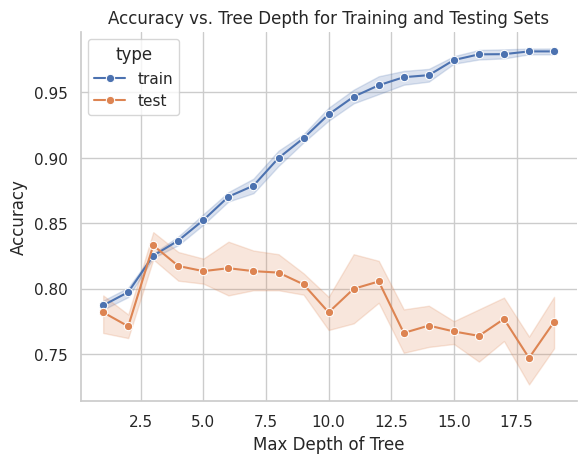

In [38]:
# Graphic of accuracy
sns.set(style="whitegrid")
graph = sns.lineplot(data=df_accuracies, x="depth", y="accuracy", hue="type", marker="o")

# Titel
graph.set_title('Accuracy vs. Tree Depth for Training and Testing Sets')

# Axis labels
graph.set_xlabel('Max Depth of Tree')
graph.set_ylabel('Accuracy')

# Display
sns.despine()

-> To find the best depth level graphically for our decision tree (`max_depth_optimal`). We need to take into account several elements, the train score accuracy (in blue on the graph) and the test score accuracy (in orange on the graph), the variance of each of the two score accuracy (represented by the shaded area around the points on the graph).

As always in machine learning, we need to think in terms of a tradeoff: we need to maximize the test score accuracy, without being biased and looking only at it. It's therefore important to take into account both the train score accuracy and the variance of these two elements, because a high-performance model with a very high variance is not optimal, as it may end up being very close to or very far from reality.

We therefore decided to graphically choose `max_depth_optimal` a **3**. As can be seen from the graph, it maximizes test score accuracy while keeping train score fairly high. However, choosing an `optimal_max_depth` of **4** or **5** is interesting because, while it would slightly reduce the accuracy of our test score, it would give us a better training score and lower variance, and therefore greater consistency in our model.

The most important thing is to keep `max_depth_optimal` relatively low to avoid problems of overffiting, and to choose what suits us best from the different possibilities between train score and test score.

In [48]:
# max_depth_optimal
tree_optimal = DecisionTreeClassifier(max_depth=3)

# Adjusted tree training
tree_optimal.fit(X_train, y_train)

# Prediction
yhat_train_optimal = tree_optimal.predict(X_train)
yhat_test_optimal = tree_optimal.predict(X_test)

# Precision calculation
accuracy_train_optimal = accuracy_score(y_train, yhat_train_optimal)
accuracy_test_optimal = accuracy_score(y_test, yhat_test_optimal)
depth_optimal = tree_optimal.get_depth()

print(f"-- Optimal accuracy on training set: {accuracy_train_optimal:.2f}")
print(f"-- Optimal accuracy on test set: {accuracy_test_optimal:.2f}")
print(f"-- Optimal depth: {depth_optimal}")

-- Optimal accuracy on training set: 0.82
-- Optimal accuracy on test set: 0.82
-- Optimal depth: 3


-> This level of depth brings us to an accuracy rate for the training part and the test part of **82%** and **82%** respectively. This again represents an improvement on point B7 (**79%** for the test section).


**Your answer below the line**


---



##Question B.11

We will now select the best value for the `max_depth` parameter and retrain the decision tree.

Then, we will use the `plot_tree` method on the trained tree to display the resulting decision tree in a visual way

By using the option `filled=True`, we enforce a color-coding of the tree nodes as a function of the most represented target class within the nodes.

How would you interpret the first node split? Can you connect this to an analysis you already made earlier on in the notebook?

Write your answer in the markdown cell below the code cel.

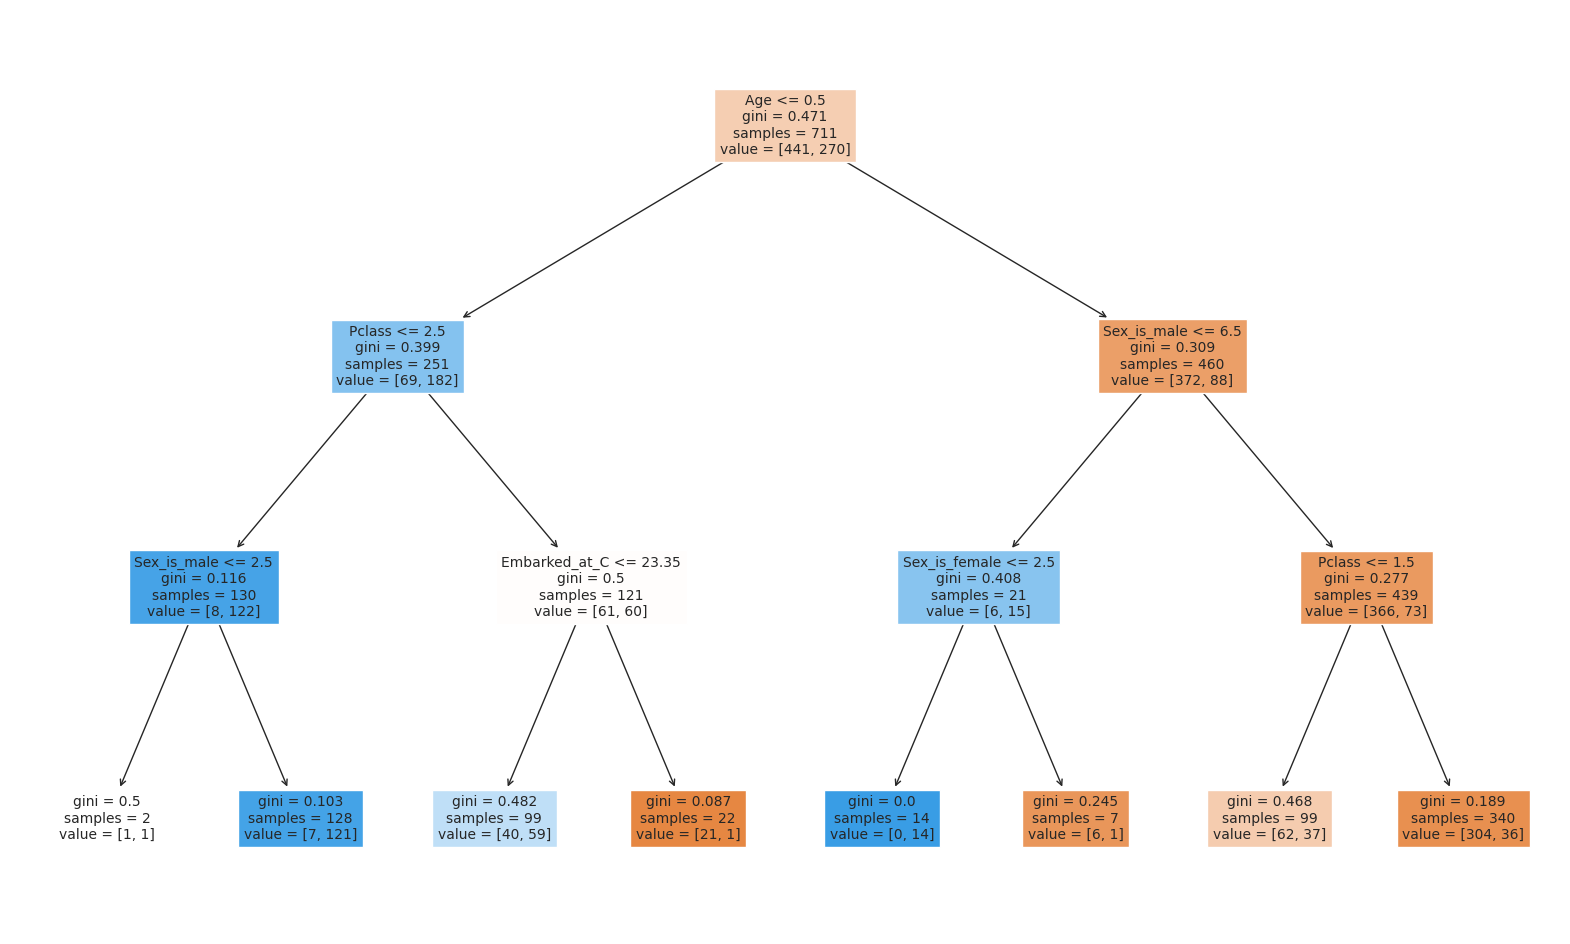

In [49]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# retrain de tree with best parameter
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8)
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

plt.figure(figsize=(20,12))  # set plot size (denoted in inches)

plot_tree(tree, filled=True, fontsize=10, feature_names=["Pclass", "Sex_is_male","Sex_is_female","Embarked_at_S","Embarked_at_C", "Embarked_at_Q", "Age", "SibSp", "Parch", "Fare"])
plt.show()

We can see different information in the first node of our decision tree. The first parameter is `Age`, which means that it's the age factor that will create the greatest distinction between all the observations in our dataframe. `Age` will therefore be the argument with the greatest impact in relation to the trait under study (`Survived`). We can also see that the gini index is relatively low (**0.4**). The index is normally between **0** and **1**, the closer the value is to **1**, the more homogeneous it is. A coefficient of **0.4** therefore means that age is rather heterogeneous aboard the Titanic, and that people are of relatively different ages.
Next, we can see the sample which is equal to the length of our database minus the rows where we have no age for the people. The value, on the other hand, will give us information on the proportion of people who survived on the basis of our main characteristic.

In our first analysis of our dataframe, we saw that the impact of `Sex` was relatively significant on the `Survived` factor. Indeed, we saw that women had a much higher survival rate than men. We therefore concluded that the `Sex_female` trait attracted the survival trait more than the `Sex_male` trait. Through our decision tree, we can see that male or female sex is indeed a node in our tree, but not the main one. This means that there is a more important factor than gender. This analysis was only possible thanks to our decision tree, which is one of its strengths.

**Your answer below the line**


---

